In [1]:
import json
import numpy as np
import os 
from natsort import natsorted
from os.path import join,basename
from collections import Counter
from glob import glob
import pickle

In [2]:
dires={'co':join('dataset_raw','smarthome_raw','alphapose','CD2'),
'co_json':join('dataset_raw','smarthome_raw','alphapose','CD2','json'),
'co_kp_pkl':join('dataset_raw','smarthome_raw','alphapose','CD2','kp_pkl'),
'co_bbox_pkl':join('dataset_raw','smarthome_raw','alphapose','CD2','bbox_pkl')}

In [3]:
co_classnames=natsorted(os.listdir(dires['co_json']))

In [4]:
co_classnames

['Drink.Fromcup', 'Readbook', 'Uselaptop', 'Usetelephone']

In [5]:
def non_duplicated_img(json_data):
    ## return non_duplicated_frames
    image_id=[i['image_id'] for i in json_data]
    counts=Counter(image_id)
    frames_ids=[] ## Stire the non duplicated image id
    for key,value in counts.items():

        if value !=1:
            continue

        frames_ids.append(key)
    
    return frames_ids


In [6]:
analyse={i:[] for i in co_classnames}

In [7]:
seq_len=42

In [8]:
for classname in co_classnames:
    json_dires=glob(join(dires['co_json'],classname)+'/*.json')
    for json_dire in json_dires:
        file_name=basename(json_dire)[:-5]
        with open(json_dire,'r') as f:
            json_data=json.load(f)
        unique_imageid=non_duplicated_img(json_data)
        filter_json_data=[i for i in json_data if i['image_id'] in unique_imageid]
        img_bbxs={i['image_id']:i['box'] for i in filter_json_data}  
        img_kps={i['image_id']:i['keypoints'] for i in filter_json_data}  

        #analyse[classname].append(len(img_kps))
        ## Saving in pkl format imag_id with bbox info
        
        target_pkl_bbox_folder=join(dires['co_bbox_pkl'],classname)
        target_pkl_kp_folder=join(dires['co_kp_pkl'],classname)

        if not os.path.exists(target_pkl_bbox_folder):
            os.makedirs(target_pkl_bbox_folder)
        
        if not os.path.exists(target_pkl_kp_folder):
            os.makedirs(target_pkl_kp_folder)

        target_pkl_bbox_file=target_pkl_bbox_folder+'/'+file_name+'.pickle'
        target_pkl_kp_file=target_pkl_kp_folder+'/'+file_name+'.pickle'

        with open(target_pkl_bbox_file,'wb') as f:

            pickle.dump(img_bbxs,f)

        
        if len(img_kps) >= seq_len:
            analyse[classname].append(len(img_kps))


            with open(target_pkl_kp_file,'wb') as f:

                pickle.dump(img_kps,f)

            
        

    
        

: 

In [9]:
import seaborn as sns

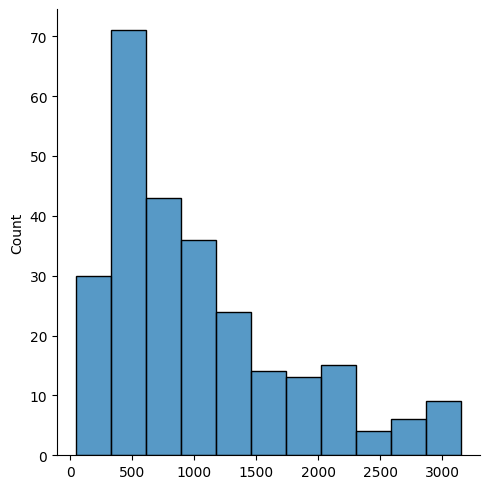

In [10]:
sns.displot(analyse[co_classnames[-2]])

In [ ]:
target_pkl_bbox_file

In [11]:
np.min(analyse[co_classnames[-2]])

46

[949,
 199,
 448,
 198,
 283,
 224,
 839,
 1107,
 335,
 106,
 519,
 270,
 223,
 144,
 139,
 98,
 229,
 1366,
 419,
 564,
 448,
 574,
 2279,
 274,
 1584,
 1262,
 1038,
 577,
 403,
 771,
 1014,
 907,
 1465,
 1119,
 59,
 967,
 2253,
 2062,
 2062,
 1829,
 861,
 434,
 431,
 675,
 1121,
 1062,
 2149,
 2147,
 1440,
 1433,
 1561,
 2078,
 2068,
 990,
 1553,
 3062,
 3041,
 1709,
 1629,
 2195,
 3150,
 75,
 797,
 2529,
 1501,
 560,
 1954,
 554,
 389,
 1916,
 1390,
 777,
 544,
 1511,
 916,
 286,
 1746,
 824,
 237,
 618,
 895,
 640,
 382,
 1203,
 266,
 429,
 791,
 2158,
 1382,
 70,
 832,
 720,
 910,
 1322,
 1807,
 925,
 492,
 2220,
 831,
 921,
 1837,
 698,
 545,
 949,
 118,
 573,
 732,
 337,
 788,
 431,
 508,
 483,
 704,
 431,
 537,
 365,
 1572,
 94,
 1310,
 630,
 1376,
 1424,
 1843,
 82,
 1956,
 1960,
 1282,
 1292,
 2451,
 1544,
 2101,
 143,
 370,
 304,
 237,
 1283,
 705,
 1652,
 184,
 190,
 919,
 1238,
 685,
 732,
 877,
 436,
 507,
 282,
 541,
 516,
 932,
 1045,
 476,
 448,
 479,
 606,
 507,
 533,

In [ ]:
filter_json_data[0]['keypoints']

In [ ]:
def save_pkl()